##KIKO(Knock-In Knock-Out)
KIKO(Knock-In Knock-Out)는 특정 환율 범위 내에서 유리한 환율을 보장받고, 그 범위를 벗어나면 특정 조건에 따라 불리한 환율로 거래가 이루어지는 파생상품입니다. 주로 외환거래에서 사용됩니다.

In [1]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# Google Colab에 NanumGothic 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# 설치된 폰트 확인 및 matplotlib에 적용
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font = fm.FontProperties(fname=font_path)
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 121925 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Setting up fonts-nanum-eco (1.000-7) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


최종 환율: 1.0661
Knock-Out 발생
결과 금액: -133924.67 USD


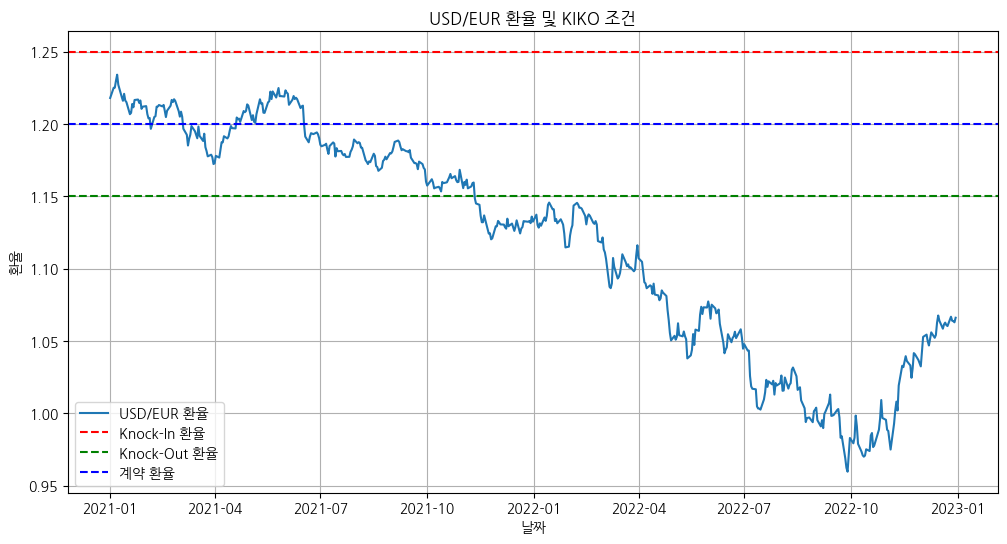

In [3]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# KIKO 상품 파라미터
notional = 1000000  # 명목 금액
knock_in_rate = 1.25  # Knock-In 환율
knock_out_rate = 1.15  # Knock-Out 환율
contract_rate = 1.20  # 계약 환율
start_date = "2021-01-01"
end_date = "2023-01-01"

# 실제 환율 데이터 가져오기 (USD/EUR 환율)
usd_eur = yf.Ticker("EURUSD=X")
usd_eur_data = usd_eur.history(start=start_date, end=end_date)
exchange_rates = usd_eur_data['Close'].values

# Knock-In, Knock-Out 조건 확인
knock_in = np.any(exchange_rates <= knock_in_rate)
knock_out = np.any(exchange_rates >= knock_out_rate)
final_rate = exchange_rates[-1]  # 만기 시점 환율

# 만기 시점에서 KIKO 조건에 따라 결과 계산
if knock_out:
    result = notional * (final_rate - contract_rate)
    outcome = "Knock-Out 발생"
elif knock_in:
    result = notional * (final_rate - knock_in_rate)
    outcome = "Knock-In 발생"
else:
    result = notional * (final_rate - contract_rate)
    outcome = "Knock-In/Out 없음"

print(f"최종 환율: {final_rate:.4f}")
print(f"{outcome}")
print(f"결과 금액: {result:.2f} USD")

# 시각화
dates = usd_eur_data.index

plt.figure(figsize=(12, 6))
plt.plot(dates, exchange_rates, label='USD/EUR 환율')
plt.axhline(y=knock_in_rate, color='r', linestyle='--', label='Knock-In 환율')
plt.axhline(y=knock_out_rate, color='g', linestyle='--', label='Knock-Out 환율')
plt.axhline(y=contract_rate, color='b', linestyle='--', label='계약 환율')
plt.xlabel('날짜')
plt.ylabel('환율')
plt.title('USD/EUR 환율 및 KIKO 조건')
plt.legend()
plt.grid(True)
plt.show()
